# Steps of PCA
- Step1: Mean subtraction and standardization --> data: normal distribution: X_k = X_k - X_mean -> E(x) = u = 0
- Step2: Tính ma trận hiệp phương sai: S = 1/(N-sample) * X * X^T
- Step3: Find Eigenvalue of matrix S: (lamda)--> increasing
- Step4: Lấy k trị riêng có giá trị lớn nhất, tạo ma trận B(U) với các hàng là các vector riêng ứng với k trị riêng đã chọn
- Step5: Ánh xạ không gian ban đầu sang không gian k chiều: X_{new} = Z = B*X

# Exercise2: Implement thuật toán PCA bằng numpy

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = pd.read_csv('iris (1).csv')


In [9]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [10]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
class PCA:
    def __init__(self, n_dimention : int):
        self.n_dimention = n_dimention
    def fit_transform(self, X):
        mean = np.mean(X, axis = 0)
        X = X - mean
        cov = X.T.dot(X) / X.shape[0]
        eigen_values, eigen_vextors = np.linalg.eig(cov)
        select_index = np.argsort(eigen_values)[::-1][:self.n_dimention]
        B = eigen_vextors[:, select_index]
        X_new = X.dot(B)
        return X_new
 

# Exercise3: Reduce dimention of the iris dataset use PCA in exercise 2

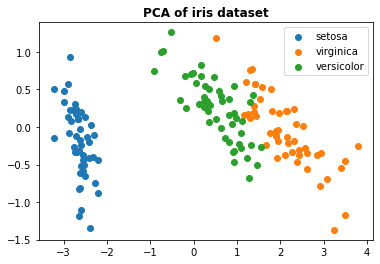

In [12]:
# a: Visualize dữ liệu giảm chiều với scatter plot và label của hoa   
    if __name__ == "__main__":
    data = data
    X = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
    Y = data["species"].to_numpy()
    pca = PCA(n_dimention = 2)
    new_X = pca.fit_transform(X)
    
    for label in set(Y):
        X_class = new_X[Y == label]
        plt.scatter(X_class[:, 0], X_class[:, 1], label=label)
    plt.title('PCA of iris dataset', weight = 'bold')
    plt.legend()

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

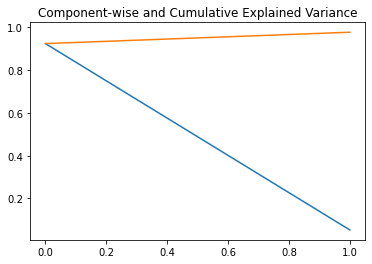

In [16]:
#b Vẽ explained variance graph với các chiều của dữ liệu
plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

# Exercise 4: reduce dimentipon of the iris dataset với thuật toán PCA trong sklearn


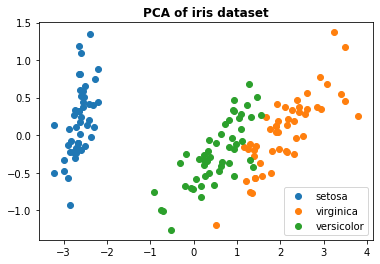

In [13]:
data = pd.read_csv('iris (1).csv')
from sklearn.decomposition import PCA
if __name__ == "__main__":
    data = data
    X = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
    Y = data["species"].to_numpy()
    pca = PCA (n_components = 2 )
    new_X = pca.fit_transform(X)
    
    for label in set(Y):
        X_class = new_X[Y == label]
        plt.scatter(X_class[:, 0], X_class[:, 1], label=label)
    plt.title('PCA of iris dataset', weight = 'bold')
    plt.legend()

# => Has the same result with exercise 3